# Home Climate Data

## Get everything ready

In [2]:
import pandas as pd
import json

In [3]:
with open("/Users/benjamin/dev/climate_sensor/climate_data.json", "r") as fp:
    data = json.load(fp)
    df = pd.DataFrame(data)
    print(df)

                             timestamp  location  temperature  humidity
0           2021-08-29 02:05:34.984113  basement         21.0      73.0
1           2021-08-29 02:05:38.513170  basement         20.0      72.0
2           2021-08-29 02:05:42.042295  basement         20.0      72.0
3           2021-08-29 02:05:45.573211  basement         21.0      73.0
4           2021-08-29 02:05:49.103348  basement         20.0      72.0
...                                ...       ...          ...       ...
9403  2021-08-31 02:34:23.556717+00:00  basement         21.0      68.0
9404  2021-08-31 02:34:34.772072+00:00  basement         21.0      67.0
9405  2021-08-31 02:34:46.004769+00:00  basement         21.0      67.0
9406  2021-08-31 02:34:57.298275+00:00  basement         21.0      67.0
9407  2021-08-31 02:35:08.547315+00:00  basement         21.0      68.0

[9408 rows x 4 columns]


## Covert the timestamp to a datetime data type

In [4]:
df['timestamp'] =  pd.to_datetime(df['timestamp'], utc=True, infer_datetime_format=True).dt.tz_convert('Canada/Eastern') 

## Plot the raw data

<AxesSubplot:xlabel='timestamp'>

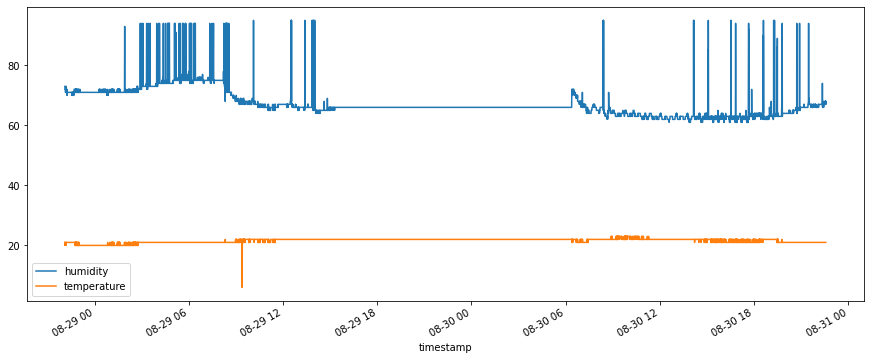

In [5]:
df.plot(x='timestamp', y=['humidity', 'temperature'], kind='line', figsize=(15,6))
# df.plot(x='timestamp', y='temperature', kind='line', style='g', figsize=(15,6))

## Group the time into 10 minute intervals
Smooths out the data and aggregates to the mean to avoid the outlier data

In [6]:
agg_10m = df.groupby(pd.Grouper(key='timestamp', freq='10Min')).median()


In [7]:
agg_10m

,temperature,humidity
timestamp,,
2021-08-28 22:00:00-04:00,21.0,72.0
2021-08-28 22:10:00-04:00,21.0,71.0
2021-08-28 22:20:00-04:00,21.0,71.0
2021-08-28 22:30:00-04:00,21.0,71.0
2021-08-28 22:40:00-04:00,21.0,72.0
...,...,...
2021-08-30 21:50:00-04:00,21.0,67.0
2021-08-30 22:00:00-04:00,21.0,66.0
2021-08-30 22:10:00-04:00,21.0,67.0


## 📈 Graph time

<AxesSubplot:title={'center':'Temperature and Humidity'}, xlabel='timestamp'>

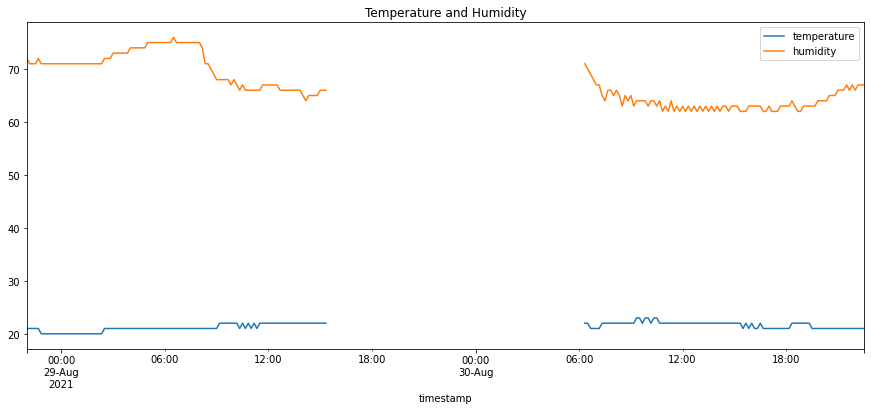

In [8]:
agg_10m.plot(kind='line', title="Temperature and Humidity", figsize=(15,6))